In [1]:
import pandas as pd
import requests

SNOTEL_API = "https://wcc.sc.egov.usda.gov/awdbRestApi/services/v1/data"
station_triplet = "642:WA:SNTL"

todo: unclear how data availability aligns with reported data collection in snotel stations metadata. the api only returns data starting from 2005 even though the metadata reports a beginData for this station of 1978.

In [2]:
params = {
    'stationTriplets': station_triplet,
    'elements': 'SNWD',
    'duration': 'DAILY',
    'periodRef': 'END',
    'beginDate': "2014-01-01 00:00",
    'endDate': "2025-01-01 00:00",
}
response = requests.get(SNOTEL_API, params=params)

In [3]:
response.json()

[{'stationTriplet': '642:WA:SNTL',
  'data': [{'stationElement': {'elementCode': 'SNWD',
     'ordinal': 1,
     'durationName': 'DAILY',
     'dataPrecision': 0,
     'storedUnitCode': 'in',
     'originalUnitCode': 'in',
     'beginDate': '2005-10-11 16:00',
     'endDate': '2100-01-01 00:00',
     'derivedData': False},
    'values': [{'date': '2014-01-01', 'value': 25},
     {'date': '2014-01-02', 'value': 27},
     {'date': '2014-01-03', 'value': 29},
     {'date': '2014-01-04', 'value': 28},
     {'date': '2014-01-05', 'value': 27},
     {'date': '2014-01-06', 'value': 28},
     {'date': '2014-01-07', 'value': 27},
     {'date': '2014-01-08', 'value': 38},
     {'date': '2014-01-09', 'value': 38},
     {'date': '2014-01-10', 'value': 39},
     {'date': '2014-01-11', 'value': 51},
     {'date': '2014-01-12', 'value': 58},
     {'date': '2014-01-13', 'value': 54},
     {'date': '2014-01-14', 'value': 52},
     {'date': '2014-01-15', 'value': 50},
     {'date': '2014-01-16', 'value'

In [4]:
df = pd.DataFrame(response.json()[0]['data'][0]["values"])
df.date = pd.to_datetime(df.date)
df

,date,value
0,2014-01-01,25
1,2014-01-02,27
2,2014-01-03,29
3,2014-01-04,28
4,2014-01-05,27
...,...,...
3880,2024-12-28,104
3881,2024-12-29,105
3882,2024-12-30,101
3883,2024-12-31,98


In [5]:
df.date = pd.to_datetime(df.date)

There was a 2014-2015 snow drought, possibly due to [the blob](https://en.wikipedia.org/wiki/The_Blob_(Pacific_Ocean)).

<Axes: xlabel='date'>

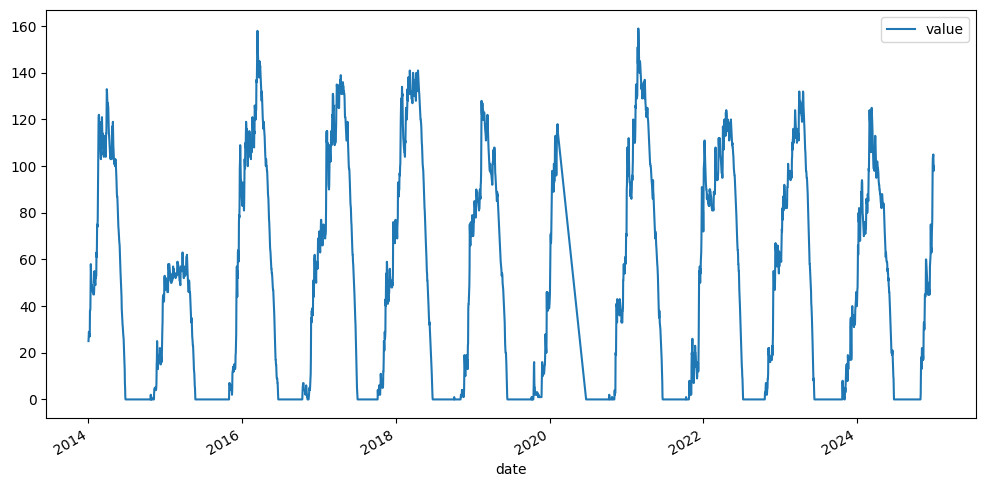

In [6]:
df.plot(x='date', y='value', figsize=(12, 6))

In [7]:
def get_season_year(date):
    month = date.month
    year = date.year
    
    if month in [11, 12, 1, 2, 3]:
        # For Nov-Dec, use current year. For Jan-Mar, use previous year
        # This groups Nov 2023 - Mar 2024 as "2023-2024"
        if month in [11, 12]:
            season_year = f"{year}-{year+1}"
        else:  # Jan, Feb, Mar
            season_year = f"{year-1}-{year}"
        return ('Nov-Mar', season_year)
    # else:
    #     return ('Other', str(year))

df['season_info'] = df['date'].apply(get_season_year)
df['season'] = df['season_info'].str[0]
df['season_year'] = df['season_info'].str[1]

# Group by both season and year
grouped = df.groupby(['season_year'])['value'].sum()
grouped

season_year
2013-2014     7265
2014-2015     5977
2015-2016    12984
2016-2017    10837
2017-2018    13362
2018-2019    10617
2019-2020     4589
2020-2021    12989
2021-2022    10395
2022-2023    11011
2023-2024     9518
2024-2025     3174
Name: value, dtype: int64

<Axes: xlabel='season_year'>

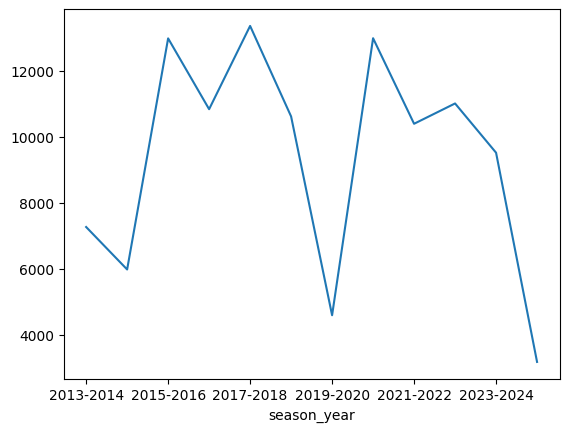

In [8]:
grouped.plot()